# Car Price Prediction Using Keras

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Heatmap
1. [Step 4: Data Preprocessing](#4) 
   - One-Hot Encoding
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
1. [Step 6: Normalizing the Data](#6)
1. [Step 7: Building a Model](#7)
1. [Step 8: K-Fold Validation](#8)
1. [Step 9: Training](#9)
1. [Step 10: Model Evaluation](#10)
   - MSE Score
1. [Step 11: Prediction](#11)

## Setting-up Envoirnment 

Firstly, we will import all the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.figsize']=(12,5)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
#!pip install openpyxl

<a id="1"></a> <br>
## Loading Data

In [2]:
df_car = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")
#data_car = pd.read_excel("../input/car-price-prediction/Data Dictionary - carprices.xlsx")

In [3]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Checking Shape and Size

In [4]:
print(df_car.shape)
print(df_car.size)

(205, 26)
5330


<a id="2"></a> <br>
## Cleaning the Data

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There is no missing value.

In [6]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Dropping Useless Column

In [7]:
df_car.drop(columns = ['car_ID'], inplace= True)

<a id="3"></a> <br>
## Data Visualization

<AxesSubplot:>

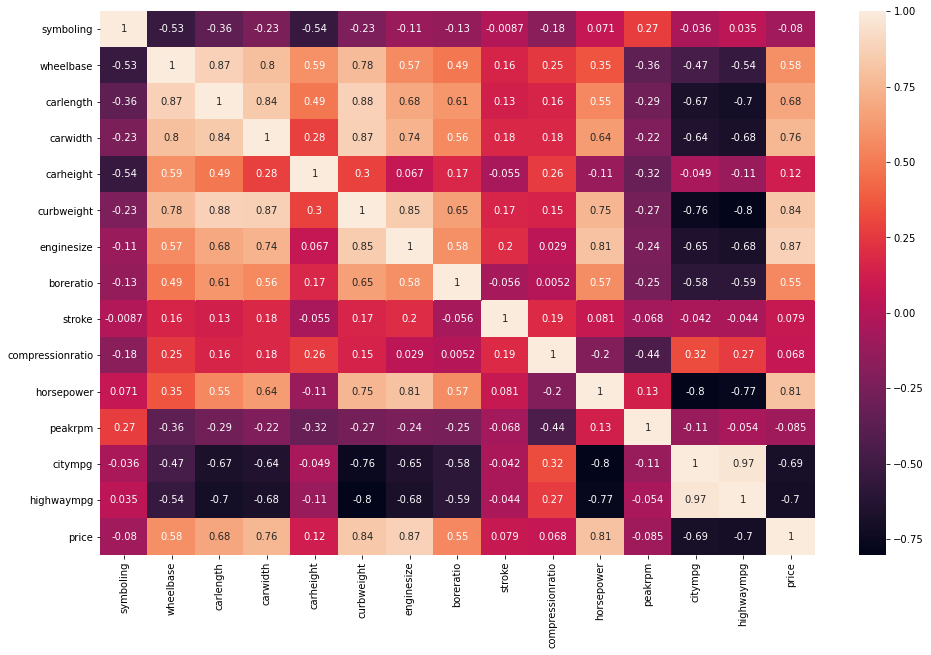

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df_car.select_dtypes(include=['int','float']).corr(),annot=True)

Price is highly(positively) correlated with wheelbase, carlength, carwidth, curbweight and enginesize. And negatively correlated with citympg and highwaympg.

<a id="4"></a> <br>
## Data Preprocessing

In [9]:
df_car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
# Coverting categorical data to dummy variables
car_dummies = pd.get_dummies(df_car,columns=['symboling','CarName', 'fueltype', 'aspiration', 'doornumber','carbody', 
                                             'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [11]:
car_dummies.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="5"></a> <br>
## Splitting the Data
Splitting data into training and testing data.

In [12]:
# Training Data
np.random.seed(11111) 
msk = np.random.rand(len(car_dummies)) < 0.72
X_train = car_dummies[msk]
X_test = car_dummies[~msk]

In [13]:
print(len(X_train))
print(len(X_test))

141
64


In [14]:
# Target Data 
y_train = X_train.pop('price')
y_test = X_test.pop('price')

In [15]:
{X_train.columns.get_loc(c): c for idx, c in enumerate(X_train.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'symboling_-2',
 14: 'symboling_-1',
 15: 'symboling_0',
 16: 'symboling_1',
 17: 'symboling_2',
 18: 'symboling_3',
 19: 'CarName_Nissan versa',
 20: 'CarName_alfa-romero Quadrifoglio',
 21: 'CarName_alfa-romero giulia',
 22: 'CarName_alfa-romero stelvio',
 23: 'CarName_audi 100 ls',
 24: 'CarName_audi 100ls',
 25: 'CarName_audi 4000',
 26: 'CarName_audi 5000',
 27: 'CarName_audi 5000s (diesel)',
 28: 'CarName_audi fox',
 29: 'CarName_bmw 320i',
 30: 'CarName_bmw x1',
 31: 'CarName_bmw x3',
 32: 'CarName_bmw x4',
 33: 'CarName_bmw x5',
 34: 'CarName_bmw z4',
 35: 'CarName_buick century',
 36: 'CarName_buick century luxus (sw)',
 37: 'CarName_buick century special',
 38: 'CarName_buick electra 225 custom',
 39: 'CarName_buick opel isuzu deluxe',
 40: 'CarNam

<a id="6"></a> <br>
## Normalizing the Data
Here we are normalizing data by subtracting data by mean of the data and then dividing by standard deviation of the data.

In [16]:
X_mean = X_train.iloc[:,0:13].mean(axis=0) # taking mean of training data
X_train.iloc[:,0:13] -= X_mean # subtracting the mean from training data
X_std = X_train.iloc[:,0:13].std(axis=0) # taking std of training data
X_train.iloc[:,0:13] /= X_std # dividing train data by std
X_test.iloc[:,0:13] -= X_mean # subrating the mean from testing data
X_test.iloc[:,0:13] /= X_std # dividing test data by std

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1753: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [17]:
y_mean = y_train.mean() 
y_train -= y_mean
y_std = y_train.std()
y_train /= y_std
y_test -= y_mean
y_test /= y_std

### Changing Data Type To Float

In [18]:
X_train = np.asarray(X_train).astype(float)
X_test = np.asarray(X_test).astype(float)

y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

In [19]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

141
141
64
64


<a id="7"></a> <br>
## Building a Model

In [20]:
def build_model():
    model = Sequential()
    model.add(Dense(80 , activation='relu', input_shape=(X_train.shape[-1],))) # Input Layer
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(40 , activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(20 , activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(10 , activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Compiling Model
    return model

**Note** the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely
used loss function for regression problems.

In [21]:
build_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                16400     
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

<a id="8"></a> <br>
## K- Fold Validation

In [22]:
import numpy as np
k =  4 # no of folds
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
    print('processing fold #', i)
    val_X = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],  axis=0)
    # print(partial_train_data)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_X, val_y, verbose=0)
    all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


##### Validation MSE

In [23]:
val_mse

0.05872998386621475

In [24]:
all_scores_relu

[0.44457826018333435,
 0.5539795756340027,
 0.47394949197769165,
 0.1863839328289032]

<a id="9"></a> <br>
## Training
Here we will call model and train on the training data and evaluate on the test data.

In [25]:
model_relu = build_model()
model_relu.fit(X_train, y_train,epochs= 80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.2472 - mae: 0.3689


<a id="10"></a> <br>
## Model Evaluation

In [26]:
# MSE Score
test_mse_score

0.24718722701072693

In [27]:
# MAE Score
test_mae_score

0.3689236640930176

<a id="11"></a> <br>
## Prediction

In [28]:
x_relu = model_relu.predict(X_test[5].reshape(1,X_test.shape[1]))

 **Note** that here we will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate y = x * std + mean and then we will compare it with our target values.

In [29]:
x_relu * y_std + y_mean

array([[10424.113]], dtype=float32)

### Actual Value

In [30]:
 y_test[5] * y_std + y_mean 

7609.0

### If this Kernel helped you in any way, some <span style="color:red">UPVOTES !!!</span> would be very much appreciated.